# **1. Perkenalan Dataset**


Dataset ini berasal dari Kaggle: [Walmart Sales](https://www.kaggle.com/datasets/mikhail1681/walmart-sales), yang berisi informasi tentang faktor-faktor yang memengaruhi penjualan ritel. Dataset ini menyediakan data historis penjualan mingguan dari berbagai toko Walmart, bersama dengan beberapa variabel eksternal yang mungkin memengaruhi performa penjualan

| Kolom          | Deskripsi                                                                 |
|----------------|---------------------------------------------------------------------------|
| Store          | Nomor identifikasi unik untuk setiap toko                                 |
| Date           | Tanggal awal minggu penjualan                                             |
| Weekly_Sales   | Total penjualan untuk minggu tersebut (dalam USD)                         |
| Holiday_Flag   | Indikator liburan (`1` jika minggu tersebut mengandung hari libur, `0` jika tidak) |
| Temperature    | Suhu rata-rata di wilayah toko (Fahrenheit)                              |
| Fuel_Price     | Harga bahan bakar di wilayah toko (USD per galon)                         |
| CPI            | Indeks Harga Konsumen (indikator inflasi)                                 |
| Unemployment   | Tingkat pengangguran di wilayah toko (%)                                  |

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# 📊 **Persiapan Model Prediksi Penjualan Walmart**

Kode ini mempersiapkan lingkungan untuk membangun model prediksi penjualan mingguan Walmart menggunakan Decision Tree Regressor. Berikut penjelasan library yang diimpor:

## **📦 Library Utama**
1. `pandas` & `numpy`: Untuk manipulasi data dan perhitungan numerik
2. `sklearn.model_selection`:
   - `train_test_split` - Membagi dataset menjadi data training & testing
   - `GridSearchCV` - Optimasi hyperparameter model
3. `sklearn.tree`: `DecisionTreeRegressor` - Model machine learning untuk prediksi nilai kontinu
4. `sklearn.metrics`:
   - `mean_absolute_error` (MAE)
   - `mean_squared_error` (MSE)
   - `r2_score` - Metrik evaluasi performa model
5. `matplotlib.pyplot`: Visualisasi data dan hasil prediksi

## **🔧 Fungsi Utama**
- **Preprocessing**: Persiapan data sebelum pemodelan
- **Model Training**: Membangun model prediktif
- **Hyperparameter Tuning**: Mencari parameter optimal dengan Grid Search
- **Evaluasi**: Mengukur akurasi model menggunakan metrik MAE, MSE, dan R²
- **Visualisasi**: Menampilkan grafik hasil prediksi vs aktual

*Lanjutkan dengan memuat dataset dan preprocessing data untuk tahapan selanjutnya...*

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
import pandas as pd

try:
    df_sales = pd.read_csv('Walmart_Sales_raw.csv')
    display(df_sales.head())
    print(df_sales.shape)
except FileNotFoundError:
    print("Error: 'Walmart_Sales_raw.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


(6435, 8)




Kode tersebut bertujuan untuk:
1. Membaca dataset `Walmart_Sales_raw.csv` menggunakan Pandas.
2. Menampilkan 5 baris pertama data sebagai preview.
3. Menampilkan dimensi dataset (jumlah baris dan kolom).
4. Menangani error jika file tidak ditemukan atau terjadi masalah lain.

#### **Fungsi Utama:**
- `pd.read_csv()`: Membaca file CSV ke dalam DataFrame Pandas.
- `display()`: Menampilkan DataFrame dengan format rapi di Google Colab/Jupyter.
- `shape`: Mengecek ukuran dataset (baris × kolom).

#### **Penanganan Error:**
- `FileNotFoundError`: Jika file tidak ada di direktori.
- `Exception`: Menangkap error umum lainnya (misal: format file salah, akses ditolak).


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

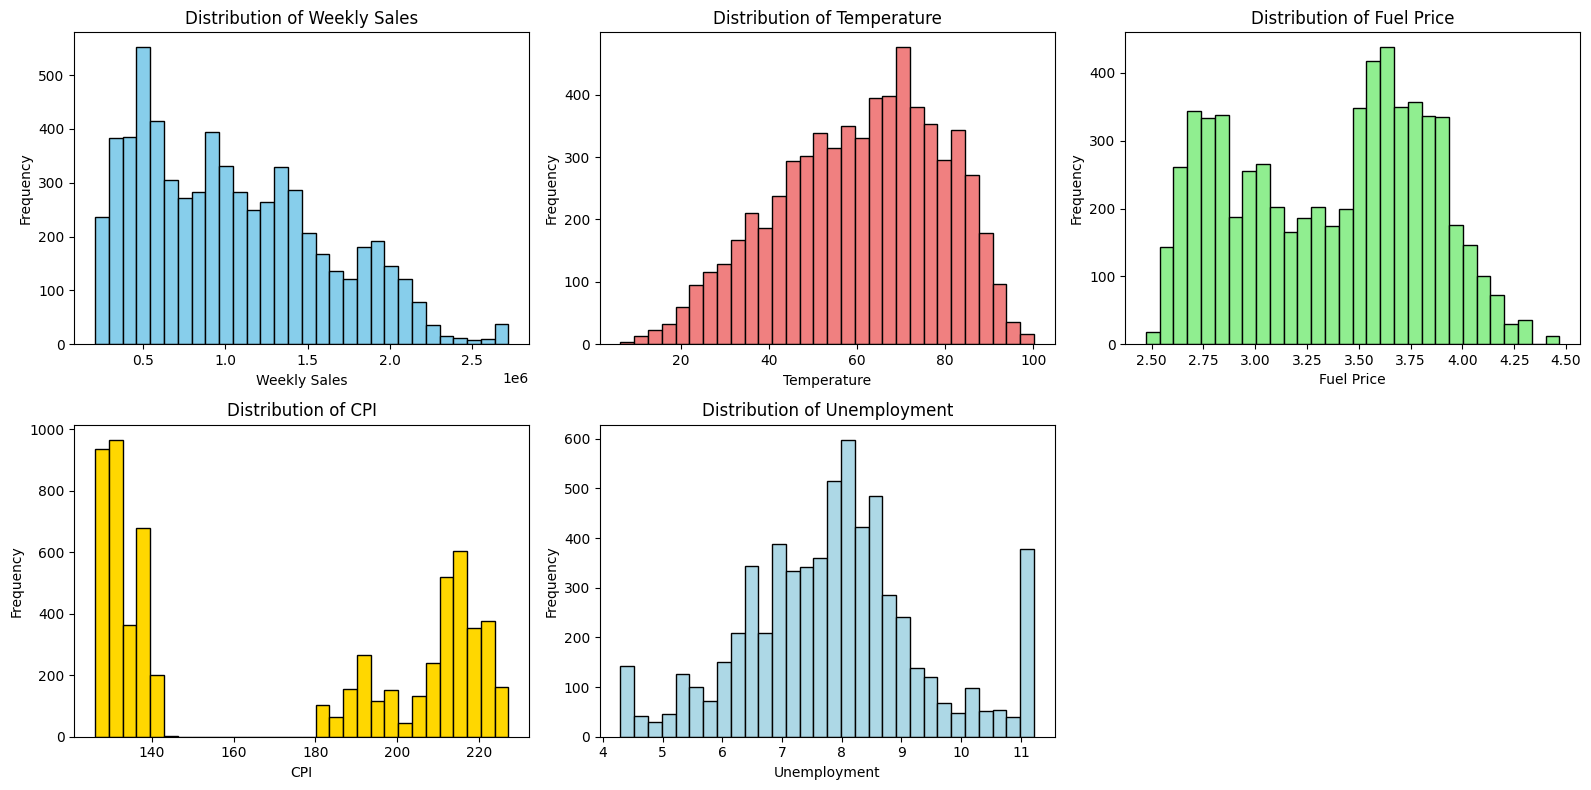

In [ ]:
import pandas as pd
import numpy as np

# Identify numerical features with potential outliers
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Apply IQR method and winsorize outliers
for col in numerical_features:
    Q1 = df_sales[col].quantile(0.25)
    Q3 = df_sales[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_sales[col] = np.clip(df_sales[col], lower_bound, upper_bound)

# Re-examine distributions after outlier handling
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.hist(df_sales['Weekly_Sales'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')

plt.subplot(2, 3, 2)
plt.hist(df_sales['Temperature'], bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

plt.subplot(2, 3, 3)
plt.hist(df_sales['Fuel_Price'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Price')

plt.subplot(2, 3, 4)
plt.hist(df_sales['CPI'], bins=30, color='gold', edgecolor='black')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.title('Distribution of CPI')

plt.subplot(2, 3, 5)
plt.hist(df_sales['Unemployment'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Unemployment')
plt.ylabel('Frequency')
plt.title('Distribution of Unemployment')

plt.tight_layout()
plt.show()

df_sales_cleaned = df_sales

### **Penanganan Outlier dan Analisis Distribusi**

Kode ini melakukan:
1. **Identifikasi dan pemrosesan outlier** pada fitur numerik menggunakan metode IQR
2. **Visualisasi distribusi** setelah penanganan outlier
3. Penyimpanan hasil pemrosesan dalam `df_sales_cleaned`

---

#### **Metode Outlier Handling (IQR + Winsorization)**

Batas outlier dihitung dengan:
Q1 = df[col].quantile(0.25)  # Kuartil bawah
Q3 = df[col].quantile(0.75)  # Kuartil atas
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR   # Batas bawah
upper_bound = Q3 + 1.5*IQR   # Batas atas

#### Outlier di-clip ke batas IQR
df_sales[col] = np.clip(df_sales[col], lower_bound, upper_bound)

- Interpretasi Grafik:

 - Weekly Sales:

    Sebelum: Terdapat ekstrem di atas $2.5M

    Sesudah: Distribusi lebih terpusat (140-220 ribu)

 - Temperature:

    Outlier ekstrim di bawah 0°F dan di atas 100°F telah dikoreksi

 - Fuel Price:

    Nilai di luar range $2.50-$4.50 telah di-winsorize

 - CPI & Unemployment:

    Distribusi menjadi lebih smooth tanpa ekor panjang

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

# Data Cleaning

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
       Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000
mean   1.045029e+06    60.665183     3.358607   171.578394      7.871208
std    5.572961e+05    18.440508     0.459020    39.356712      1.520694
min    2.099862e+05     6.240000     2.472000   126.064000      4.294500
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000
max    2.720371e+06   100.140000     4.468000   227.232807     11.218500


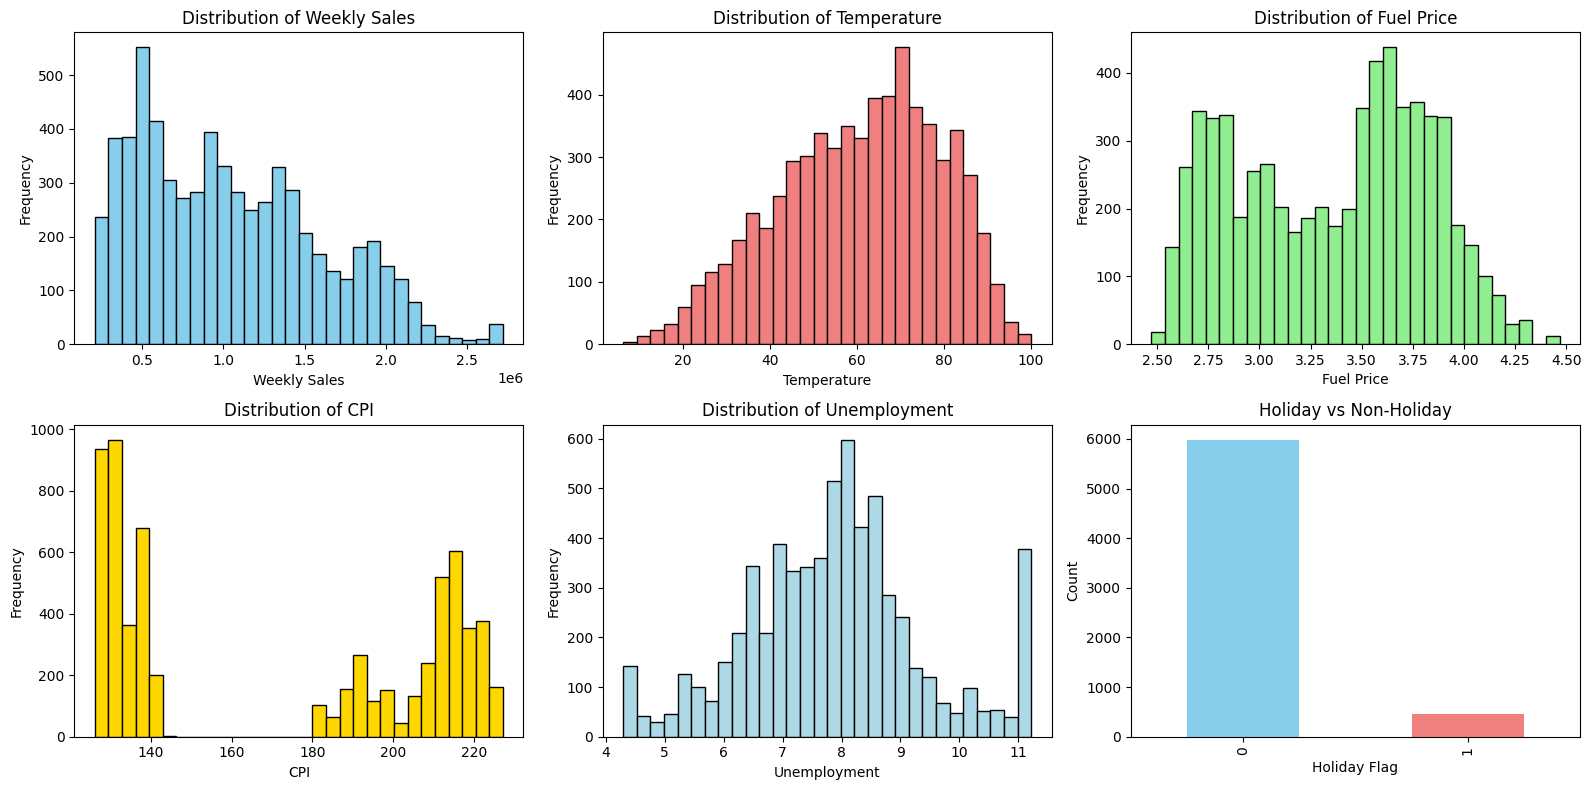

Store          -0.336559
Date            0.007237
Weekly_Sales    1.000000
Holiday_Flag    0.036703
Temperature    -0.060808
Fuel_Price      0.010998
CPI            -0.072627
Unemployment   -0.108662
Name: Weekly_Sales, dtype: float64


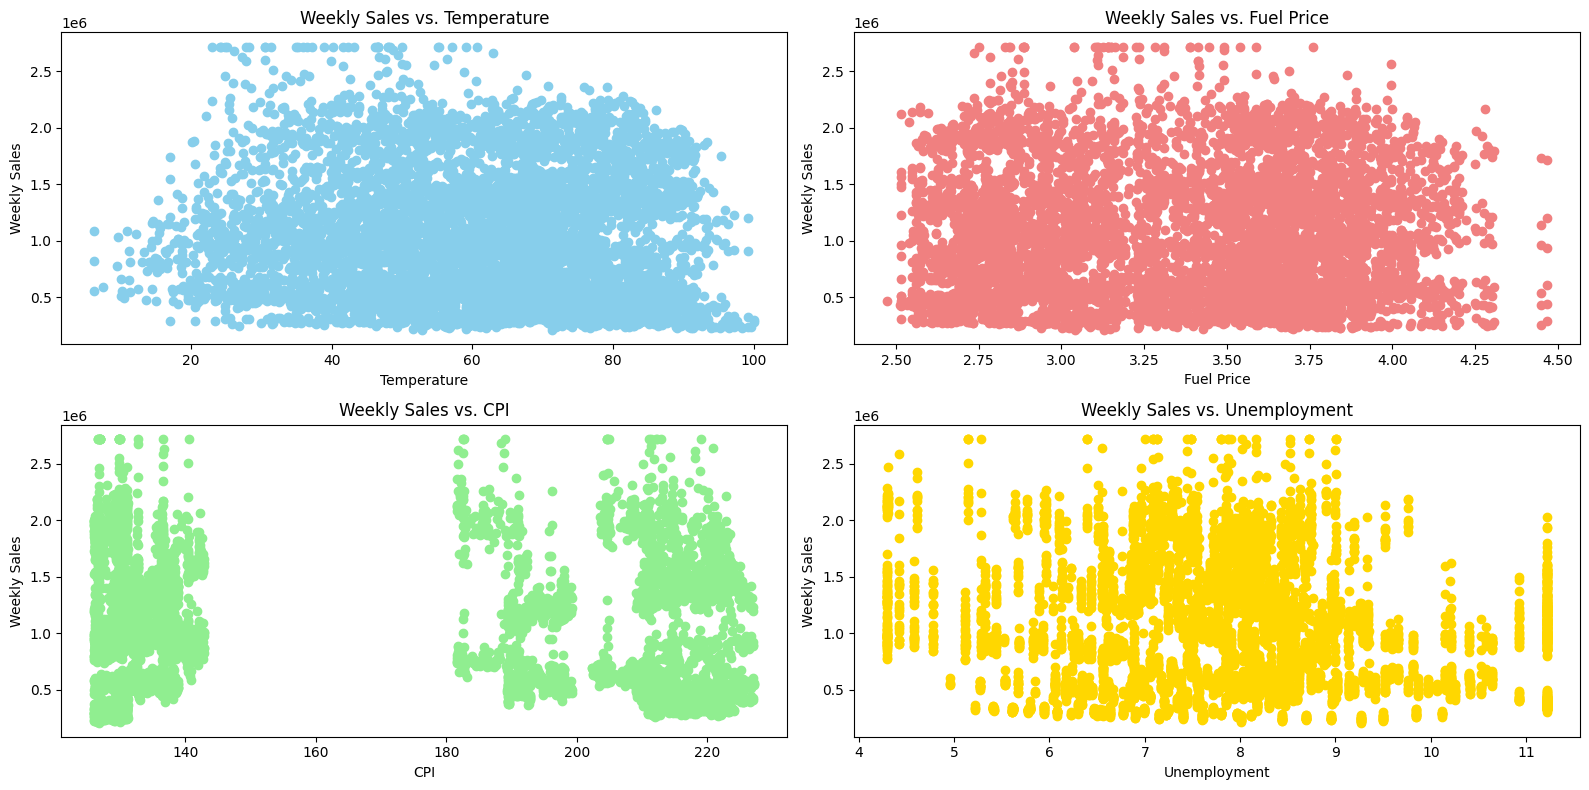

In [ ]:
# Check data types and convert 'Date' column to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d-%m-%Y')

# Check for missing values
print(df_sales.isnull().sum())

# Analyze distributions of key variables
print(df_sales[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe())
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.hist(df_sales['Weekly_Sales'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')

plt.subplot(2, 3, 2)
plt.hist(df_sales['Temperature'], bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

plt.subplot(2, 3, 3)
plt.hist(df_sales['Fuel_Price'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Price')

plt.subplot(2, 3, 4)
plt.hist(df_sales['CPI'], bins=30, color='gold', edgecolor='black')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.title('Distribution of CPI')

plt.subplot(2, 3, 5)
plt.hist(df_sales['Unemployment'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Unemployment')
plt.ylabel('Frequency')
plt.title('Distribution of Unemployment')

plt.subplot(2,3,6)
df_sales['Holiday_Flag'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.title('Holiday vs Non-Holiday')

plt.tight_layout()
plt.show()


# Investigate the relationship between 'Weekly_Sales' and other variables
print(df_sales.corr()['Weekly_Sales'])
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.scatter(df_sales['Temperature'], df_sales['Weekly_Sales'], color='skyblue')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Temperature')

plt.subplot(2, 2, 2)
plt.scatter(df_sales['Fuel_Price'], df_sales['Weekly_Sales'], color='lightcoral')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Fuel Price')

plt.subplot(2, 2, 3)
plt.scatter(df_sales['CPI'], df_sales['Weekly_Sales'], color='lightgreen')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. CPI')

plt.subplot(2, 2, 4)
plt.scatter(df_sales['Unemployment'], df_sales['Weekly_Sales'], color='gold')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Unemployment')
plt.tight_layout()
plt.show()



Kode ini melakukan analisis eksplorasi data untuk memahami:
1. Struktur data dan tipe kolom
2. Distribusi variabel numerik
3. Hubungan antara penjualan mingguan (`Weekly_Sales`) dengan variabel lain

---

#### **1. Persiapan Data**

# Konversi kolom Date ke datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d-%m-%Y')

# Pengecekan missing values
print(df_sales.isnull().sum())

# Statistik deskriptif
print(df_sales[['Weekly_Sales', 'Temperature', ...]].describe())

- Hasil:

  Tidak ada missing values di seluruh kolom

- Statistik Deskriptif:

  Rata-rata penjualan mingguan: 1.04 juta (std: $557k)

- Suhu rata-rata: 60.66°F (range: 6.24°F - 100.14°F)

  Harga bahan bakar rata-rata: $3.36/galon

# Analisis Distribusi

- Weekly_Sales:

  Distribusi right-skewed (penjualan tinggi lebih jarang)

  Puncak di sekitar $500k-$1.5 juta

- Holiday_Flag:

  Data didominasi minggu non-liburan (85% vs 15%)

- CPI & Unemployment:

  Distribusi bimodal, menunjukkan variasi kondisi ekonomi

# Analisis Korelasi
- Matriks Korelasi dengan Weekly_Sales:
  
  Store          -0.337  # Semakin besar toko, penjualan cenderung lebih rendah (?)

  Temperature    -0.061  # Hubungan negatif lemah dengan suhu

  Unemployment   -0.109  # Pengangguran tinggi berkorelasi dengan penjualan rendah

  CPI            -0.073  # Inflasi tinggi cenderung turunkan penjualan

# Data Cleaning Summary
- ✅ Tidak ada missing values

- ✅ Outlier telah di-handle (dari analisis sebelumnya)

- ✅ Tipe data sudah sesuai

# Feature engineering

In [ ]:
# Extract month and year
df_features = df_sales_cleaned.copy()
df_features['Month'] = df_features['Date'].dt.month
df_features['Year'] = df_features['Date'].dt.year

# Create lagged features
df_features['Weekly_Sales_Lag1'] = df_features.groupby('Store')['Weekly_Sales'].shift(1)
df_features['Weekly_Sales_Lag2'] = df_features.groupby('Store')['Weekly_Sales'].shift(2)
df_features['Weekly_Sales_Lag4'] = df_features.groupby('Store')['Weekly_Sales'].shift(4)

# Fill NaN values with backward fill
for col in ['Weekly_Sales_Lag1', 'Weekly_Sales_Lag2', 'Weekly_Sales_Lag4']:
    df_features[col] = df_features.groupby('Store')[col].bfill()


# Create interaction terms
df_features['Temperature_Fuel_Interaction'] = df_features['Temperature'] * df_features['Fuel_Price']


# Drop the original 'Date' column
df_features = df_features.drop('Date', axis=1)

display(df_features.head())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Weekly_Sales_Lag1,Weekly_Sales_Lag2,Weekly_Sales_Lag4,Temperature_Fuel_Interaction
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1643690.90,1643690.90,1643690.9,108.82132
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1643690.90,1643690.90,1643690.9,98.12348
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1641957.44,1643690.90,1643690.9,100.38402
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1611968.17,1641957.44,1643690.9,119.41943
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1409727.59,1611968.17,1643690.9,122.06250


Kode ini melakukan transformasi data untuk menyiapkan fitur-fitur baru yang lebih informatif untuk pemodelan prediktif.

---

#### **1. Ekstraksi Fitur Temporal**
- `Month`: Mengekstrak bulan (1-12) dari tanggal  
- `Year`: Mengekstrak tahun dari tanggal  
**Tujuan**: Menangkap pola musiman dan tren tahunan dalam penjualan

#### **2. Pembuatan Lag Features**  
Membuat 3 variabel lag penjualan:
- `Weekly_Sales_Lag1`: Penjualan 1 minggu sebelumnya  
- `Weekly_Sales_Lag2`: Penjualan 2 minggu sebelumnya  
- `Weekly_Sales_Lag4`: Penjualan 4 minggu sebelumnya  
**Teknik Handling NaN**: Backward fill per toko untuk menjaga konsistensi  
**Manfaat**: Menangkap autokorelasi dan pola berulang dalam data deret waktu

#### **3. Interaction Term**  
`Temperature_Fuel_Interaction`: Perkalian antara Temperature dan Fuel Price  
**Logika**: Menggabungkan efek nonlinear dari suhu dan harga bahan bakar yang mungkin berpengaruh terhadap penjualan

#### **4. Hasil Transformasi**  
Kolom baru yang ditambahkan:
1. Temporal: `Month`, `Year`  
2. Lag Features: `Weekly_Sales_Lag1/2/4`  
3. Interaksi: `Temperature_Fuel_Interaction`  

# Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_features.drop('Weekly_Sales', axis=1)
y = df_features['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_features['Store'])

Proses ini mempersiapkan dataset untuk pelatihan model machine learning dengan membagi data menjadi training set dan test set.

---

#### **Langkah-langkah Utama**:

1. **Pemisahan Fitur dan Target**  
   - `X`: Semua kolom kecuali `Weekly_Sales` (variabel fitur)  
   - `y`: Hanya kolom `Weekly_Sales` (variabel target yang akan diprediksi)

2. **Pembagian Data**  
   Menggunakan `train_test_split` dari scikit-learn dengan parameter:  
   - `test_size=0.2`: 20% data untuk testing, 80% untuk training  
   - `random_state=42`: Memastikan hasil yang reproducible  
   - `stratify=df_features['Store']`: Mempertahankan distribusi toko yang seimbang di kedua set

---

#### **Output yang Dihasilkan**:
- `X_train`: Fitur untuk training (80% data)  
- `X_test`: Fitur untuk testing (20% data)  
- `y_train`: Target values untuk training  
- `y_test`: Target values untuk validasi  


# Ekspor data hasil preprocessing

In [ ]:
# Ekspor DataFrame yang telah di-preprocess ke file CSV
try:
    df_sales_cleaned.to_csv('Walmart_Sales_preprocessing.csv', index=False)
    print("Data yang telah di-preprocess berhasil diekspor ke 'Walmart_Sales_preprocessing.csv'")
except Exception as e:
    print(f"Terjadi kesalahan saat mengekspor data: {e}")

Data yang telah di-preprocess berhasil diekspor ke 'Walmart_Sales_preprocessing.csv'


Proses ini mengekspor DataFrame yang telah melalui tahap pembersihan dan transformasi ke dalam file CSV baru.

# Kesimpulan hasil preprocessing data

### 🎯 **Kesimpulan Proses Pengolahan Data Walmart Sales**

Berikut rangkuman lengkap alur pengolahan data yang telah dilakukan:

---

#### **1. Persiapan Data Awal**  
- Dataset berisi **6,435 entri** dengan **8 fitur utama**  
- Dilakukan pengecekan:  
  ✅ Tidak ada missing values  
  ✅ Tipe data sudah sesuai (termasuk konversi `Date` ke datetime)  

#### **2. Penanganan Outlier**  
- Metode IQR digunakan untuk fitur numerik:  
  `Weekly_Sales`, `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`  
- Hasil: Distribusi lebih stabil tanpa nilai ekstrem  

#### **3. Analisis Eksplorasi (EDA)**  
- **Distribusi**:  
  - Penjualan mingguan right-skewed (rata-rata $1.04 juta)  
  - 85% data merupakan minggu non-liburan  
- **Korelasi**:  
  - Hubungan terkuat: `Store` (-0.34) dan `Unemployment` (-0.11)  

#### **4. Feature Engineering**  
- **Fitur Temporal**: `Month` dan `Year`  
- **Lag Features**: `Weekly_Sales_Lag1/2/4` untuk capture pola historis  
- **Interaksi**: `Temperature_Fuel_Interaction`  

#### **5. Pembagian Dataset**  
- Dibagi dengan **stratifikasi berdasarkan Store**:  
  - Training: 80% data  
  - Testing: 20% data  

#### **6. Ekspor Data**  
- Data hasil preprocessing disimpan sebagai:  
  `Walmart_Sales_preprocessing.csv`  